# Week 5 Seminar Answers

## Question 1

In [1]:
import pandas as pd
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-01,123.750000,127.930000,122.790001,127.790001,127.034966,116307900
1,2021-03-02,128.410004,128.720001,125.010002,125.120003,124.380753,102260900
2,2021-03-03,124.809998,125.709999,121.839996,122.059998,121.338821,112966300
3,2021-03-04,121.750000,123.599998,118.620003,120.129997,119.420227,178155000
4,2021-03-05,120.980003,121.940002,117.570000,121.419998,120.702599,153766600


In [2]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2022-02-18,169.820007,170.539993,166.190002,167.300003,167.300003,82772700
248,2022-02-22,164.979996,166.690002,162.149994,164.320007,164.320007,91162800
249,2022-02-23,165.539993,166.149994,159.750000,160.070007,160.070007,90009200
250,2022-02-24,152.580002,162.850006,152.000000,162.740005,162.740005,141147500
251,2022-02-25,163.839996,165.119995,160.869995,164.850006,164.850006,91974200


## Question 2

In [3]:
import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.02089356248578048,
 -0.024456613476202406,
 -0.01581187277235864,
 0.010738314875251488,
 -0.04167355170206404]

In [4]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.021114921713464116,
 -0.024760643717543645,
 -0.015938213996684786,
 0.010681068626258491,
 -0.042566798829366176]

In [5]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.29013783 and its annulized volatility is 0.24342158


In [6]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.26057363 and its annulized volatility is 0.24287806


## Question 3

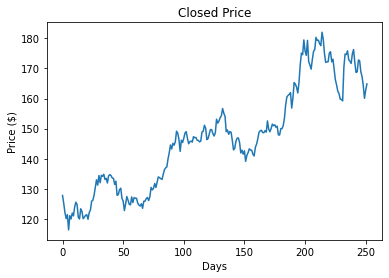

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

## Question 4

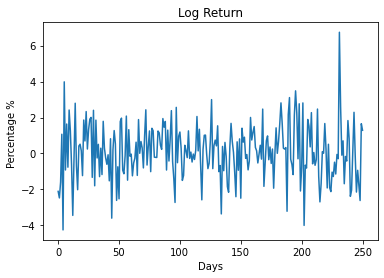

In [8]:
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

## Question 6


C:\Users\GONGH\AppData\Local\Temp/ipykernel_17252/2826937017.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


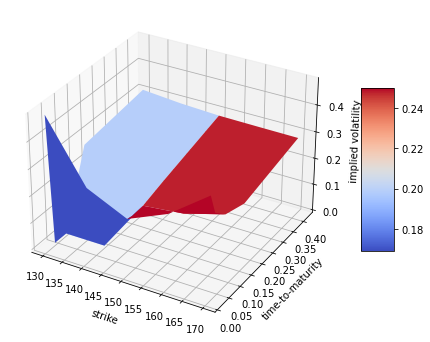

In [9]:
strike = np.array([130, 140, 150, 160, 170])
ttm = np.array([1/52, 2/52, 1/12, 2/12, 5/12])
strike, ttm = np.meshgrid(strike, ttm)
v1 = np.array([0.4901, 0.2682, 0.1995, 0.2637, 0.3742])
v2 = np.array([0.0009, 0.1912, 0.1954, 0.2296, 0.2981])
v3 = np.array([0.0000, 0.0000, 0.1976, 0.2139, 0.2568])
v4 = np.array([0.2752, 0.2370, 0.2223, 0.2214, 0.2305])
v5 = np.array([0.3093, 0.2964, 0.2891, 0.2872, 0.2858])
iv = np.array([v1, v2, v3, v4, v5])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5);

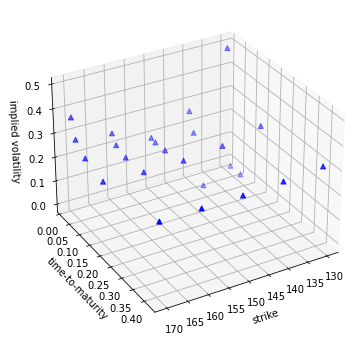

In [10]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(strike, ttm, iv, zdir='z', s=25, c='b', marker='^')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility');